In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Mental Health Dataset.csv')

In [3]:
dataset

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


# Data Pre-processing

In [4]:
#Dropping timestamp column
dataset.drop('Timestamp',axis=1,inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            287162 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

<AxesSubplot:>

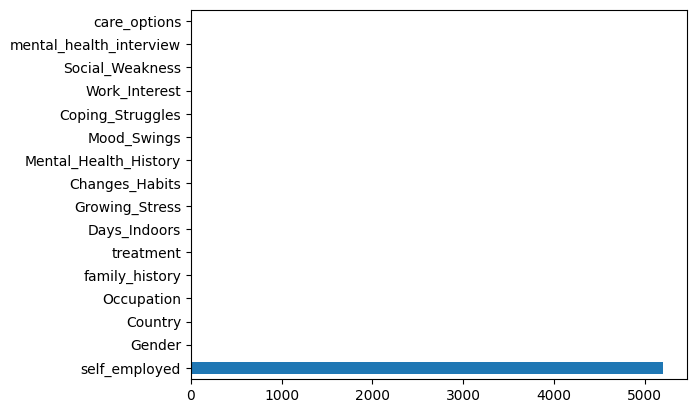

In [6]:
dataset.isnull().sum().sort_values(ascending=False).plot(kind='barh')

In [7]:
#missing values in self_employed column
# Replacing the NaN values with mode of the column
dataset.fillna(dataset.mode().iloc[0],inplace=True)

In [8]:
dataset.isnull().sum()

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [9]:
#Check for Duplicates
dataset.duplicated().sum()

198274

In [10]:
#Drop duplicate values
dataset.drop_duplicates(inplace=True)

Textual Column into numerical column using label encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.columns:
  if dataset[col].dtype=='object':
    le=LabelEncoder()
    dataset[col]=le.fit_transform(dataset[col])

In [12]:
dataset

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,34,1,0,0,1,0,2,1,2,2,0,1,2,1,1
1,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,0
2,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292342,1,24,0,0,0,0,1,1,0,1,1,1,1,0,1,0
292350,1,33,0,0,1,1,1,1,0,1,1,1,1,0,2,2
292355,1,25,0,1,0,1,1,1,0,1,1,1,1,0,1,0
292359,1,34,0,1,1,1,1,1,0,1,1,1,1,0,0,1


# Data Visualization

In [13]:
#Histplot for every columndataset.hist(figsize=(15,10))
dataset.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [14]:
# Feature vs Target column Bar plot

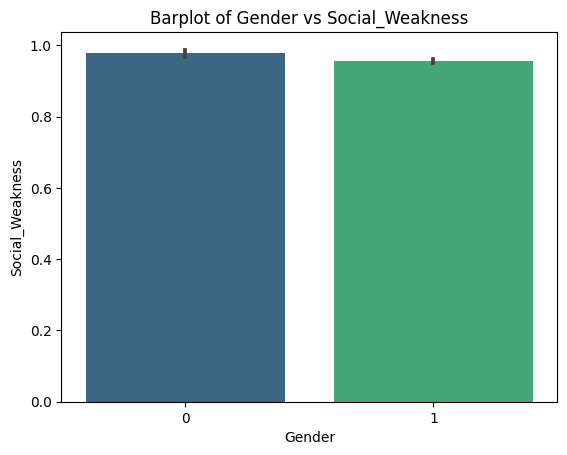

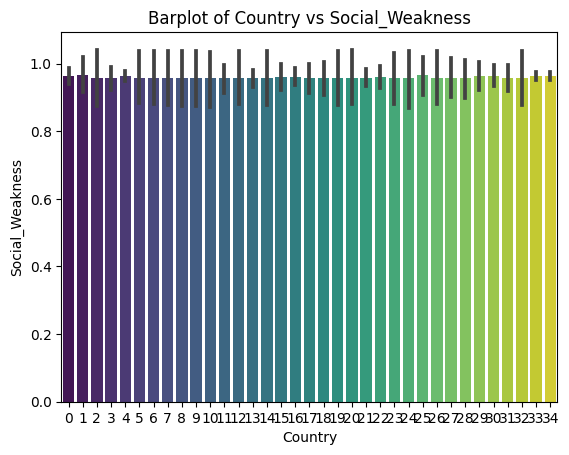

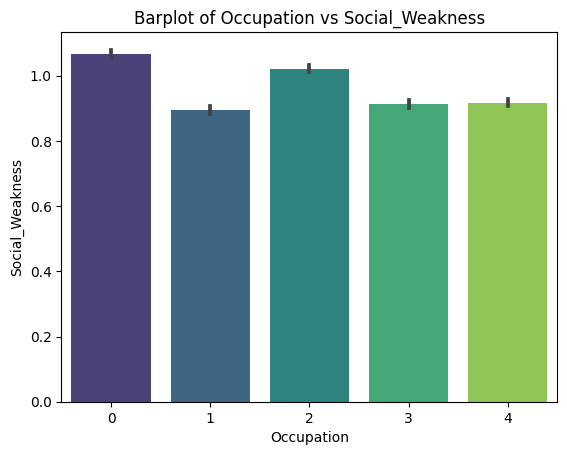

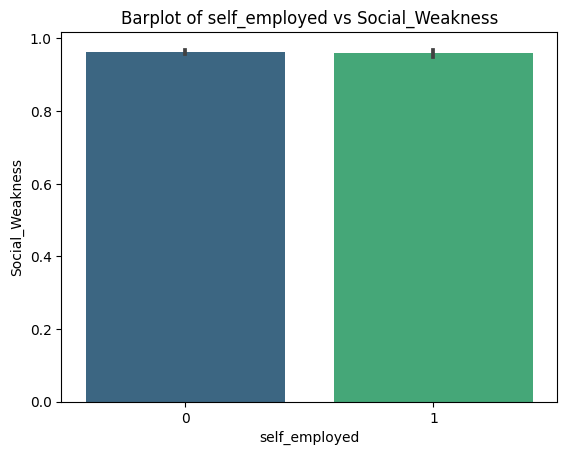

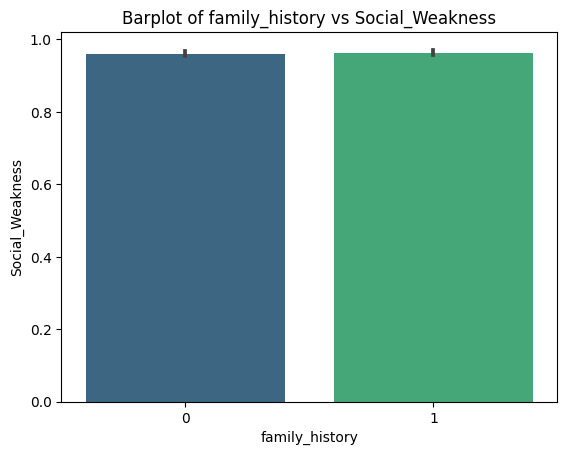

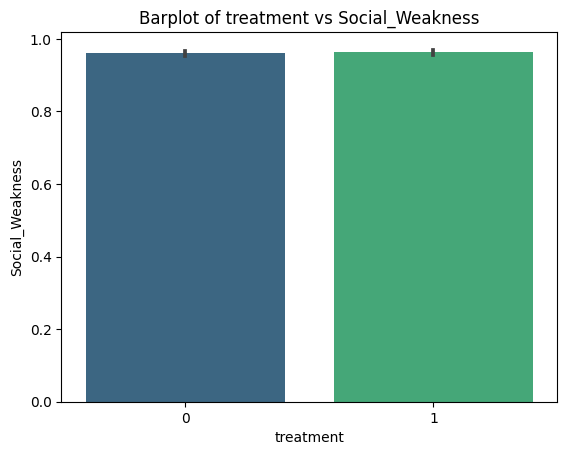

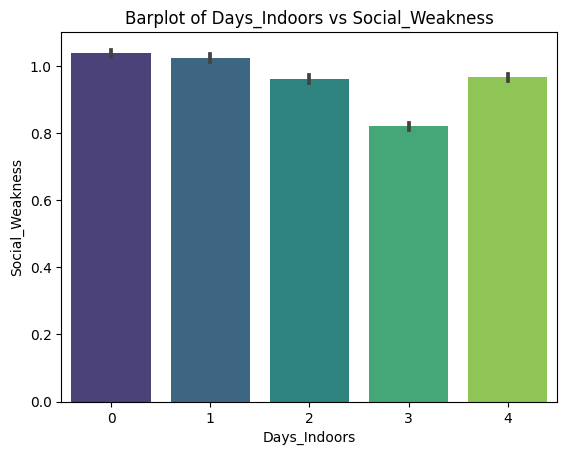

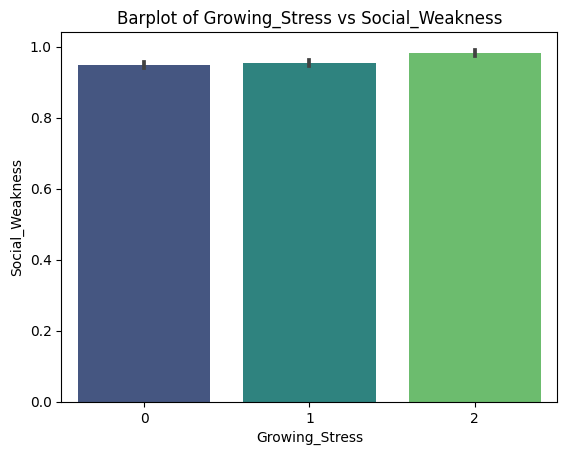

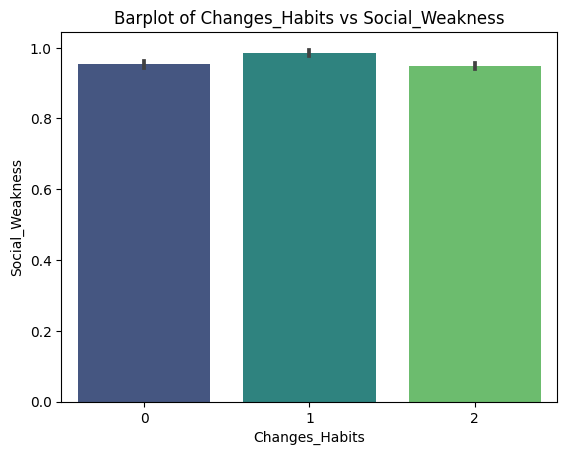

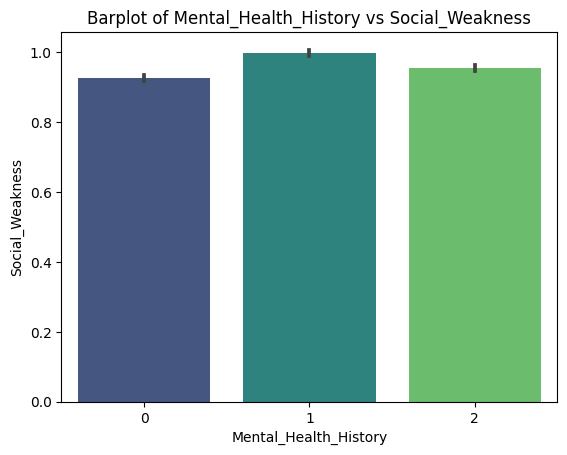

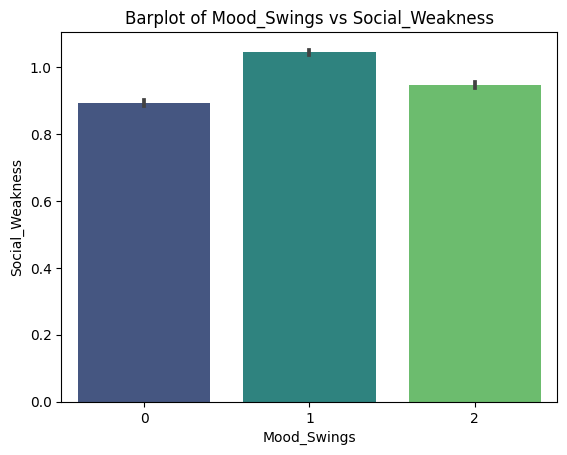

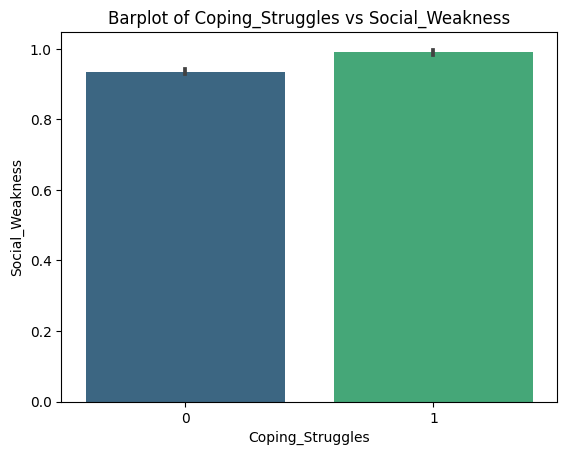

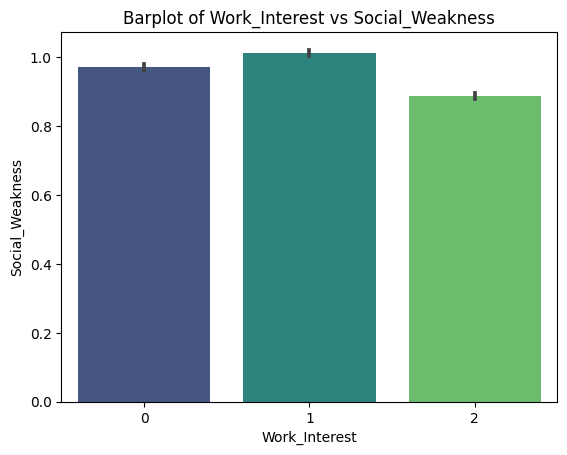

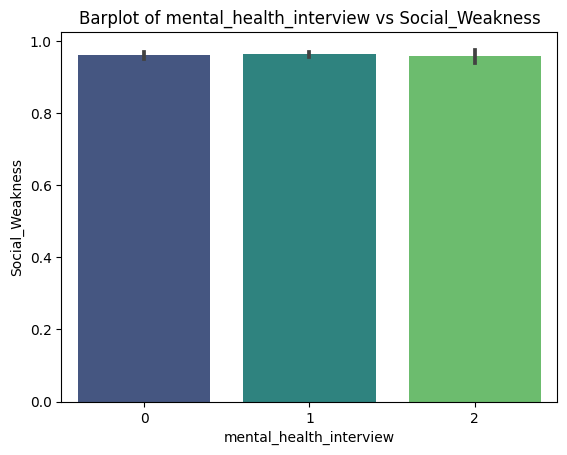

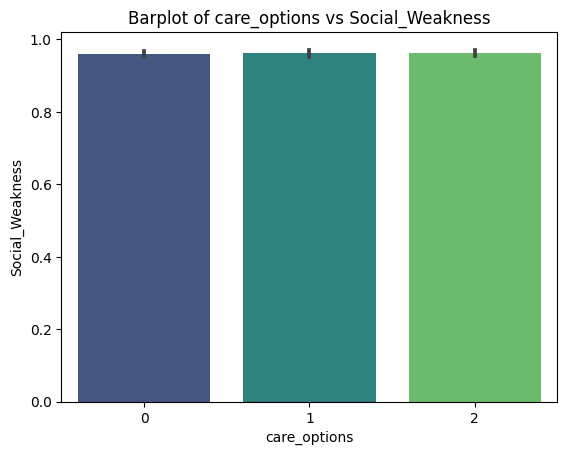

In [15]:
for col in dataset.columns:
  if col!='Social_Weakness':
    sns.barplot(x=col,y='Social_Weakness',data=dataset,palette='viridis')
    plt.title(f'Barplot of {col} vs Social_Weakness')
    plt.xlabel(col)
    plt.ylabel('Social_Weakness')
    plt.show()

# Train-test Split

In [16]:
# Target Col- Social_Weakness

In [17]:
x=dataset.drop('Social_Weakness',axis=1)
y=dataset['Social_Weakness']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from xgboost import XGBClassifier

In [21]:
#Trying out different models

In [22]:
models={
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'XGBoost':XGBClassifier()
}

# Accuracy

In [23]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"Accuracy Score of {name} is {accuracy_score(y_test,y_pred)}")

Accuracy Score of DecisionTreeClassifier is 0.9739611010734404
Accuracy Score of RandomForestClassifier is 0.9756084599851206
Accuracy Score of KNeighborsClassifier is 0.8350515463917526
Accuracy Score of GaussianNB is 0.391327452439154
Accuracy Score of XGBoost is 0.9814007864810288


# Precision, Recall and F1-Score

In [24]:
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'{name} Classification Report:')
  print(classification_report(y_test,y_pred))

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6489
           1       0.97      0.97      0.97      6384
           2       0.98      0.97      0.97      5945

    accuracy                           0.97     18818
   macro avg       0.97      0.97      0.97     18818
weighted avg       0.97      0.97      0.97     18818

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6489
           1       0.97      0.97      0.97      6384
           2       0.98      0.97      0.97      5945

    accuracy                           0.98     18818
   macro avg       0.98      0.98      0.98     18818
weighted avg       0.98      0.98      0.98     18818

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84    

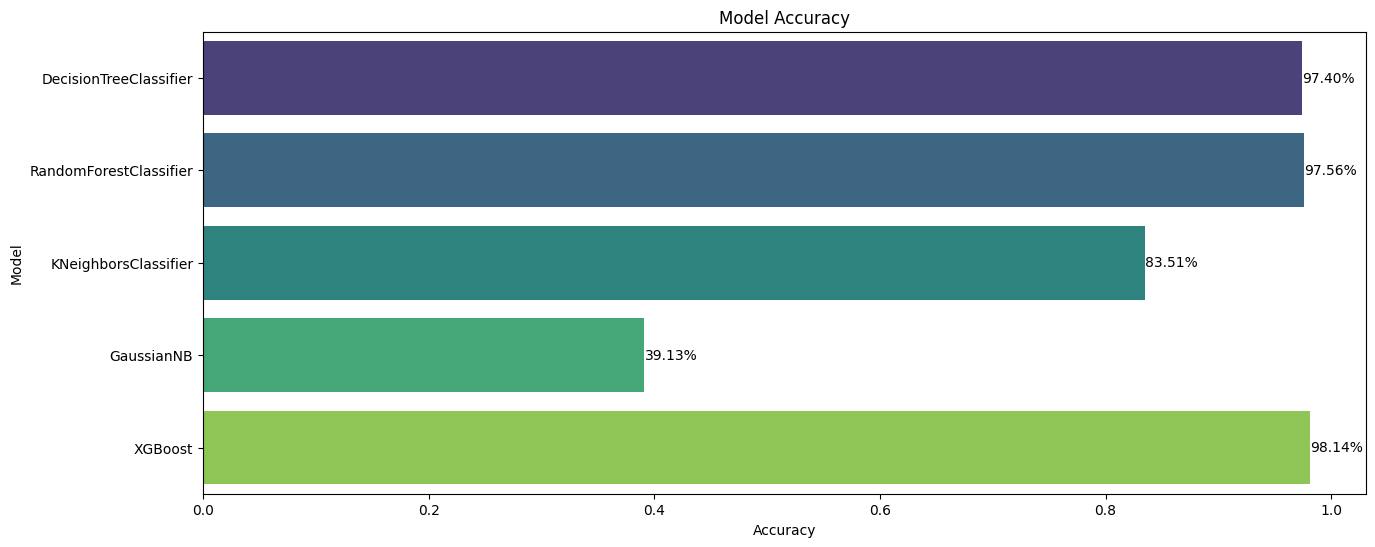

In [25]:
accuracy_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette='viridis')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
for i, v in enumerate(accuracy_scores.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()

# SHAP

In [26]:
import shap


DecisionTreeClassifier Shap Report:


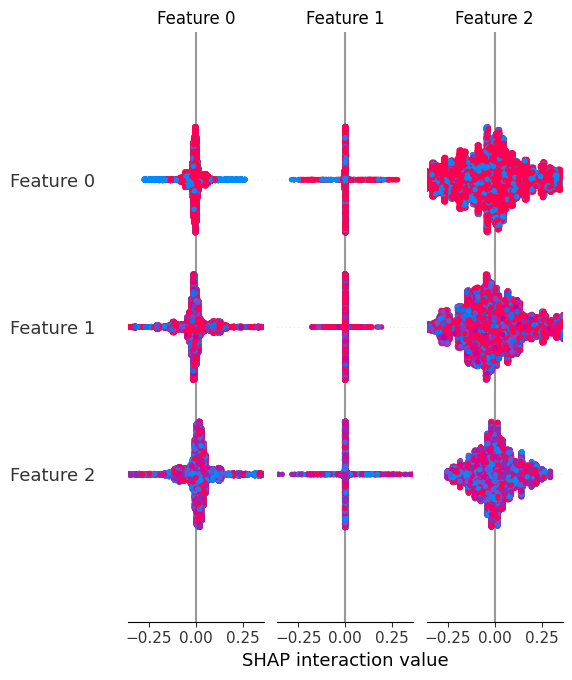

In [ ]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    explainer = shap.Explainer(model)
    shap_values = explainer(x_test)
    print(f'{name} Shap Report:')
    shap.summary_plot(shap_values, x_test)

In [ ]:
pip install gradio

# 

In [ ]:
import gradio as gr
def predict_mental_health(*args):
    # Create input array from Gradio inputs
    input_data = np.array(args).reshape(1, -1)

    # Make prediction
    prediction = model.predict(input_data)[0]
    # Post-process prediction (e.g., convert label back to string if needed)
    # You might need to inverse transform the label encoder

    # For simplicity, let's just return the numerical prediction
    return str(prediction)
# Create Gradio input components
input_components = []
for col in x.columns:
    input_components.append(gr.Number(label=col))
# Create Gradio interface
iface = gr.Interface(
    fn=predict_mental_health,
    inputs=input_components,
    outputs=gr.Textbox(label="Predicted Treatment"),
    title="Mental Health Prediction",
    description="Enter the values to get mental health predictions."
)

# Launch the interface
iface.launch()